In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as stats
from statannotations.Annotator import Annotator
import seaborn as sns
import colorcet as cc
from pathlib import Path

import sys
SPIKECOUNTER_PATH = os.getenv("SPIKECOUNTER_PATH")
sys.path.append(SPIKECOUNTER_PATH)
from spikecounter.ui import visualize
plt.style.use("/mnt/e/Documents/Cohen Lab/Code/SpikeCounter/config/bio_publications.mplstyle")

# plt.style.use("E:/Documents/Cohen Lab/Code/SpikeCounter/config/bio_publications.mplstyle")


# Load data
Traces generated using code from Jia et al. Nature 2023 (https://github.com/adamcohenlab/Jia2023FirstHeartbeat)

In [2]:
rootdir = Path("/mnt/e/Documents/Cohen Lab/Papers/Kalki_CellCycle/20231214_z20c_Voltron_GCaMP_heartbeat")
output_datadir = rootdir / "analysis" / "figs"

In [14]:
df = pd.read_csv(rootdir/"analysis/all_output_data.csv")
df["condition"] = df["condition"].map({"ctrl": "Ctrl.", "HUA": "HUA"})
df["beats_detected"] = ~np.isnan(df["heart_rate_bpm"])
df.groupby("condition").sum()["beats_detected"]


# Plot data with statistical test

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Ctrl. vs. HUA: Mann-Whitney-Wilcoxon test two-sided, P_val:3.361e-03 U_stat=4.200e+01


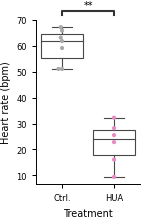

In [17]:
x = "condition"
y="heart_rate_bpm"
fig1, ax1 = plt.subplots(figsize=(1.6,2.4))
order = ["Ctrl.", "HUA"]
sns.boxplot(data=df, x=x, y=y, fliersize=0, order=order, boxprops={
    "facecolor": (0,0,0,0)
})
sns.swarmplot(data=df, x=x, y=y, s=3, order=order, palette=["#A9A9A9", "#E78AC3"])
ax1.set_xlabel("Treatment")
ax1.set_ylabel(r"Heart rate (bpm)")
pairs = [("Ctrl.", "HUA")]
annot = Annotator(ax1, pairs, data=df, x=x,y=y, order=order)
annot.configure(test="Mann-Whitney", verbose=2, loc="outside")
annot.apply_and_annotate()
plt.tight_layout()
fig1.savefig(output_datadir/"mean_freq_comparison.svg", dpi=300, bbox_inches="tight")

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Ctrl. vs. HUA: Mann-Whitney-Wilcoxon test two-sided, P_val:1.399e-02 U_stat=4.000e+00


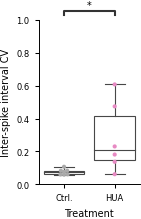

In [18]:
x = "condition"
y="isi_cv"
fig1, ax1 = plt.subplots(figsize=(1.6,2.4))
order = ["Ctrl.", "HUA"]
sns.boxplot(data=df, x=x, y=y, fliersize=0, order=order, boxprops={
    "facecolor": (0,0,0,0)
})
sns.swarmplot(data=df, x=x, y=y, s=3, order=order, palette=["#A9A9A9", "#E78AC3"])
ax1.set_xlabel("Treatment")
ax1.set_ylabel(r"Inter-spike interval CV")
ax1.set_ylim(0, 1)
pairs = [("Ctrl.", "HUA")]
annot = Annotator(ax1, pairs, data=df, x=x,y=y, order=order)
annot.configure(test="Mann-Whitney", verbose=2, loc="outside")
annot.apply_and_annotate()
plt.tight_layout()
fig1.savefig(output_datadir/"isi_cv_comparison.svg", dpi=300, bbox_inches="tight")

$10\%$
$\Delta F/F$


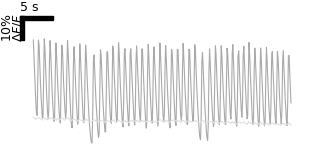

In [3]:
ctrl_trace = pd.read_csv(rootdir/"ctrl_e5_example_trace.csv")["Mean"]
ctrl_bg_trace = pd.read_csv(rootdir/"ctrl_e5_background_trace.csv")["Mean"]
dff = ctrl_trace / np.percentile(ctrl_trace, 10) - 1
bg_dff = ctrl_bg_trace / np.percentile(ctrl_bg_trace, 10) - 1
dt = 0.1
t = np.arange(0, len(ctrl_trace)*dt, dt)
fig, ax = plt.subplots(figsize=(4, 1.8))
ax.plot(t, dff, color="#A9A9A9")
ax.plot(t, bg_dff, color="#e0e0e0")
ax.set_ylim(-0.1, 0.5)
ax.set_xlim(-3, 45)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

scalebar_params = {
    "corner_x": xlim[0]+1,
    "corner_y": ylim[1]*0.9,
    "ampl_scale": 0.1,
    "time_scale": 5,
    "fontsize": 9,
    "thickness": ylim[1]*0.03,
    "xlabel_offset_y": ylim[1]*0.08,
    "xlabel_offset_x": 0,
    "ylabel_offset_x": -3,
    "ylabel_offset_y": 0.02
    }
visualize.plot_scalebars(ax, scalebar_params, pct_f=True)
fig.savefig(output_datadir/"ctrl_e5_example_trace.svg",bbox_inches="tight")

In [8]:
df_ctrl_trace = pd.DataFrame({"time_s": t, "dff": dff, "bg_dff": bg_dff})
df_ctrl_trace.to_csv(output_datadir/"ctrl_e5_example_trace.csv", index=False)

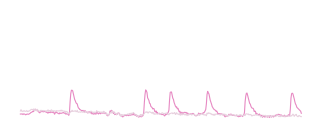

In [9]:
hua_trace = pd.read_csv(rootdir/"hua_e9_example_trace.csv")["Mean"]
hua_bg_trace = pd.read_csv(rootdir/"hua_e9_background_trace.csv")["Mean"]
dff = hua_trace / np.percentile(hua_trace, 10) - 1
bg_dff = hua_bg_trace / np.percentile(hua_bg_trace, 10) - 1
dt = 0.1
t = np.arange(0, len(hua_trace)*dt, dt)
fig, ax = plt.subplots(figsize=(4, 1.8))
ax.plot(t, dff, color="#E78AC3")
ax.plot(t, bg_dff, color="#e8d1df")
ax.set_ylim(ylim)
ax.set_xlim(xlim)
ax.set_axis_off()
fig.savefig(output_datadir/"hua_e9_example_trace.svg",bbox_inches="tight")
df_hua_trace = pd.DataFrame({"time_s": t, "dff": dff, "bg_dff": bg_dff})
df_hua_trace.to_csv(output_datadir/"hua_e9_example_trace.csv", index=False)